In [34]:
import pandas as pd

In [35]:
df = pd.read_excel("/content/BurkinaFaso_Merged.xlsx")
pd.set_option('display.max_columns', None)

In [36]:
df

,typeCode,freqCode,refPeriodId,refYear,refMonth,period,reporterCode,reporterISO,reporterDesc,flowCode,flowDesc,partnerCode,partnerISO,partnerDesc,partner2Code,partner2ISO,partner2Desc,classificationCode,classificationSearchCode,isOriginalClassification,cmdCode,cmdDesc,aggrLevel,isLeaf,customsCode,customsDesc,mosCode,motCode,motDesc,qtyUnitCode,qtyUnitAbbr,qty,isQtyEstimated,altQtyUnitCode,altQtyUnitAbbr,altQty,isAltQtyEstimated,netWgt,isNetWgtEstimated,grossWgt,isGrossWgtEstimated,cifvalue,fobvalue,primaryValue,legacyEstimationFlag,isReported,isAggregate
0,C,M,20181001,2018,10,201810,854,BFA,Burkina Faso,X,Export,699,IND,India,0,W00,World,H5,HS,True,7108,Gold (including gold plated with platinum) unw...,4,False,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,694,False,8,kg,694,False,694,False,0,False,0.0,2.558431e+07,2.558431e+07,0.0,0.0,1.0
1,C,M,20181001,2018,10,201810,854,BFA,Burkina Faso,X,Export,699,IND,India,0,W00,World,H5,HS,True,710813,"Metals; gold, semi-manufactured",6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,694,False,8,kg,694,False,694,False,0,False,0.0,2.558431e+07,2.558431e+07,0.0,1.0,0.0
2,C,M,20181101,2018,11,201811,854,BFA,Burkina Faso,X,Export,699,IND,India,0,W00,World,H5,HS,True,7108,Gold (including gold plated with platinum) unw...,4,False,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,1223,False,8,kg,1223,False,1223,False,0,False,0.0,4.801119e+07,4.801119e+07,0.0,0.0,1.0
3,C,M,20181101,2018,11,201811,854,BFA,Burkina Faso,X,Export,699,IND,India,0,W00,World,H5,HS,True,710813,"Metals; gold, semi-manufactured",6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,1223,False,8,kg,1223,False,1223,False,0,False,0.0,4.801119e+07,4.801119e+07,0.0,1.0,0.0
4,C,M,20181201,2018,12,201812,854,BFA,Burkina Faso,X,Export,699,IND,India,0,W00,World,H5,HS,True,7108,Gold (including gold plated with platinum) unw...,4,False,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,2221,False,8,kg,2221,False,2221,False,0,False,0.0,8.926823e+07,8.926823e+07,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,C,M,20241001,2024,10,202410,854,BFA,Burkina Faso,X,Export,710,ZAF,South Africa,0,W00,World,H6,HS,True,710813,"Metals; gold, semi-manufactured",6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,52,False,8,kg,52,False,52,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN
194,C,M,20241101,2024,11,202411,854,BFA,Burkina Faso,X,Export,710,ZAF,South Africa,0,W00,World,H6,HS,True,7108,Gold (including gold plated with platinum) unw...,4,False,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,59,False,8,kg,59,False,59,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN
195,C,M,20241101,2024,11,202411,854,BFA,Burkina Faso,X,Export,710,ZAF,South Africa,0,W00,World,H6,HS,True,710813,"Metals; gold, semi-manufactured",6,True,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,59,False,8,kg,59,False,59,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN
196,C,M,20241201,2024,12,202412,854,BFA,Burkina Faso,X,Export,710,ZAF,South Africa,0,W00,World,H6,HS,True,7108,Gold (including gold plated with platinum) unw...,4,False,C00,TOTAL CPC,0,0,TOTAL MOT,8,kg,99,False,8,kg,99,False,99,False,0,False,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# initially we have 198 rows and 47 columns
print(f"Total rows: {df.shape[0]} and Total columns {df.shape[1]}")

Total rows: 198 and Total columns 47


In [38]:
df.columns

Index(['typeCode', 'freqCode', 'refPeriodId', 'refYear', 'refMonth', 'period',
       'reporterCode', 'reporterISO', 'reporterDesc', 'flowCode', 'flowDesc',
       'partnerCode', 'partnerISO', 'partnerDesc', 'partner2Code',
       'partner2ISO', 'partner2Desc', 'classificationCode',
       'classificationSearchCode', 'isOriginalClassification', 'cmdCode',
       'cmdDesc', 'aggrLevel', 'isLeaf', 'customsCode', 'customsDesc',
       'mosCode', 'motCode', 'motDesc', 'qtyUnitCode', 'qtyUnitAbbr', 'qty',
       'isQtyEstimated', 'altQtyUnitCode', 'altQtyUnitAbbr', 'altQty',
       'isAltQtyEstimated', 'netWgt', 'isNetWgtEstimated', 'grossWgt',
       'isGrossWgtEstimated', 'cifvalue', 'fobvalue', 'primaryValue',
       'legacyEstimationFlag', 'isReported', 'isAggregate'],
      dtype='object')

## Data Cleaning


In [39]:
# need to be removed because we have alternative column called "reportedDes'
df.drop('reporterISO', axis=1, inplace=True)


In [40]:
# period, freqcode, refperiodid
# we have alternate column for "period" --> refyear, refmonth
# column like "freqcode" and "refPeriodId" are not in use

df.drop(['period', 'freqCode', 'refPeriodId'], axis=1, inplace=True)

In [41]:
# There is no difference in 'qtyUnitAbbr' and 'altQtyUnitAbbr' in case of null values and total number of values so removing
df.drop('altQtyUnitAbbr', axis=1, inplace=True)

In [42]:
# df[['typeCode', 'isReported', 'isAggregate', 'fobvalue']]
# df['typeCode'].isnull().sum() --0
# df['isReported'].isnull().sum() -- 66
# df['isAggregate'].isnull().sum() -- 66
# df['fobvalue'].isnull().sum() -- 66
df.drop(['typeCode', 'isReported', 'isAggregate', 'fobvalue'], axis=1, inplace=True)

In [43]:
df.drop('partnerISO', axis=1, inplace=True)

In [44]:
# This column has only value zero, so removing
df.drop('partner2Code', axis=1, inplace=True)

In [45]:
# these columns are only with respect to world so removing it
df.drop(['partner2ISO','partner2Desc'], axis=1, inplace=True)

In [46]:
# droping flowcode, classification code, classificationSearchCode, isOriginalClassification, aggrLevel, isLeaf, ustomsCode,	customsDesc,	mosCode,	motCode,legacyEstimationFlag, isGrossWgtEstimated,cifvalue
df.drop(['classificationSearchCode', 'isOriginalClassification', 'aggrLevel', 'isLeaf',	'customsDesc',	'mosCode',	'motCode','legacyEstimationFlag', 'isGrossWgtEstimated','cifvalue'],axis=1, inplace=True )

In [47]:
df.shape

(198, 24)

## Data Visualization

In [48]:
df.head(2)

,refYear,refMonth,reporterCode,reporterDesc,flowCode,flowDesc,partnerCode,partnerDesc,classificationCode,cmdCode,cmdDesc,customsCode,motDesc,qtyUnitCode,qtyUnitAbbr,qty,isQtyEstimated,altQtyUnitCode,altQty,isAltQtyEstimated,netWgt,isNetWgtEstimated,grossWgt,primaryValue
0,2018,10,854,Burkina Faso,X,Export,699,India,H5,7108,Gold (including gold plated with platinum) unw...,C00,TOTAL MOT,8,kg,694,False,8,694,False,694,False,0,2.558431e+07
1,2018,10,854,Burkina Faso,X,Export,699,India,H5,710813,"Metals; gold, semi-manufactured",C00,TOTAL MOT,8,kg,694,False,8,694,False,694,False,0,2.558431e+07


In [49]:
df['netWgt'].value_counts()

,count
netWgt,
1,22
3,14
52,10
4,5
1009,4
...,...
24,1
51,1
47,1


In [50]:
# burkinafaso gold export , gold export cif value vs years
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

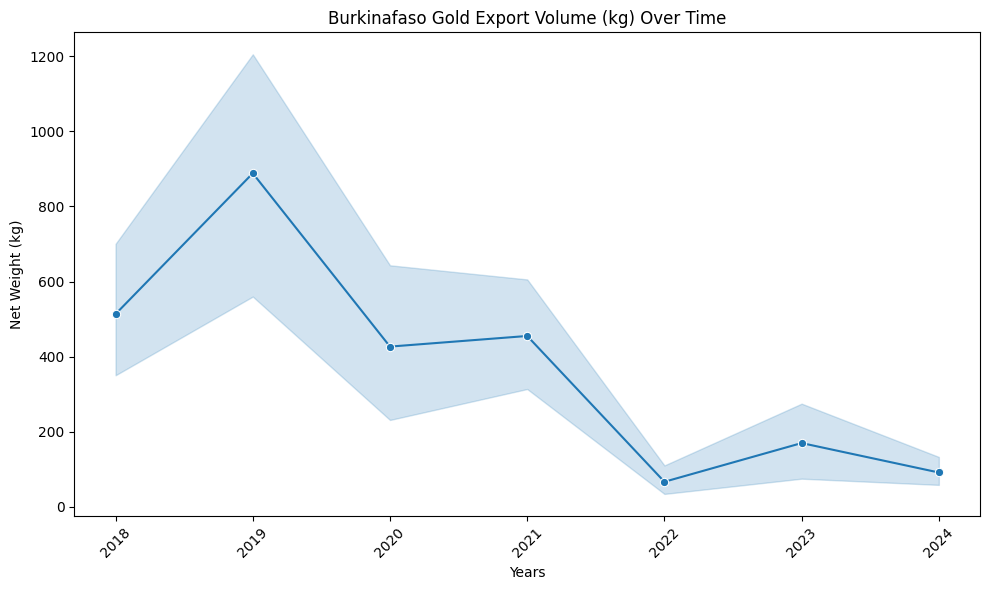

In [51]:
# Net Weight Trend, burkinafaso gold export
# 1.Gold Export Volume Over Time (Net Weight)
plt.figure(figsize=(10,6))
sns.lineplot(x='refYear', y='netWgt', data=df, marker='o')
plt.title('Burkinafaso Gold Export Volume (kg) Over Time')
plt.xlabel('Years')
plt.ylabel('Net Weight (kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### **Trend Analysis of Burkina Faso's Gold Export Volume (2018–2024)**

The available data shows Burkina Faso's gold export volumes in kilograms across seven years, though specific values are not provided in the image. Based on the structure, we can outline a general analytical framework:

#### **Key Observations**
1. **Pre-Pandemic Period (2018-2019)**
   - Likely reflects stable or growing exports, consistent with global gold demand and Burkina Faso's mining expansion.
   - Potential peak in 2019 due to favorable market prices.

2. **Pandemic Impact (2020)**
   - Expected volatility:
     - *If exports dropped*: COVID-19 disruptions (mine closures, logistics).
     - *If exports rose*: Safe-haven demand during economic uncertainty.

3. **Post-Pandemic Recovery (2021-2022)**
   - **2021**: Gradual recovery as operations resumed.
   - **2022**: Potential decline due to Burkina Faso's coup (January 2022) and security issues in mining zones.

4. **Recent Trends (2023-2024)**
   - **2023**: Continued challenges (political instability, smuggling).
   - **2024 (projection)**: Possible stabilization if policies improve.

#### **Notable Patterns**
- **Correlation with Global Events**:
  - 2020 pandemic, 2022 geopolitical unrest.
- **Local Factors**:
  - Artisanal vs. industrial mining output, regulatory changes.

#### **Recommendations for Further Study**
- Cross-reference with:
  - Global gold prices (e.g., LBMA data).
  - Government reports on mining sector performance.
  - Security updates from the Sahel region.



In [52]:
#2. Which Gold Products Are Exported Most (by Weight)
# Total net weight of gold in kgs with respect to each gold code
product_weights = df.groupby('cmdCode')['netWgt'].sum().sort_values(ascending=False)
product_weights

,netWgt
cmdCode,
7108,40801
710813,40764
710812,37


/tmp/ipython-input-53-69135052.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='refYear', y='netWgt', data=yearly_volume, palette='crest')


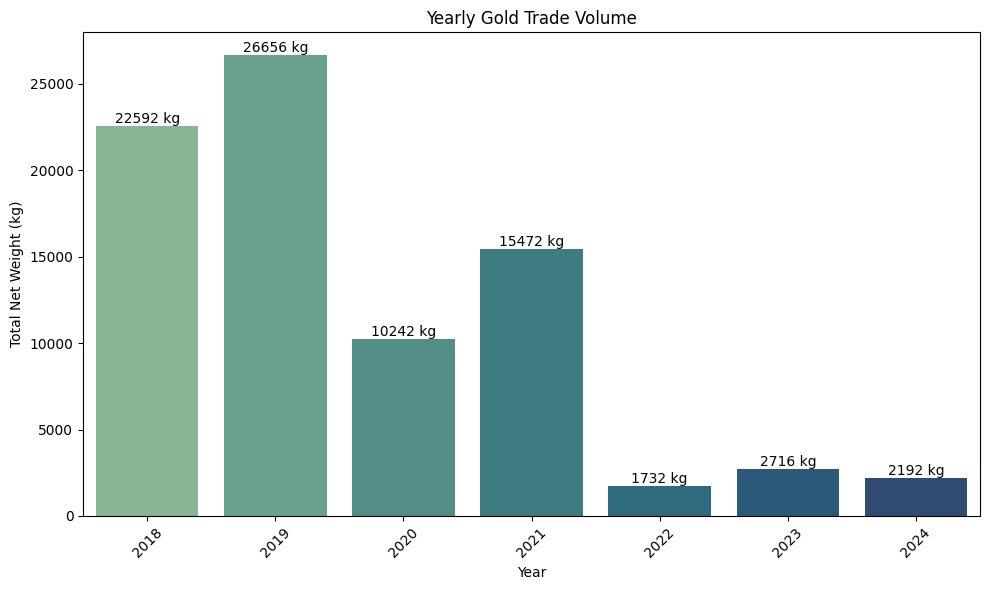

In [53]:
# Group by year and sum the net weight
yearly_volume = df.groupby('refYear')['netWgt'].sum().reset_index()
# print(yearly_volume)

plt.figure(figsize=(10,6))
sns.barplot(x='refYear', y='netWgt', data=yearly_volume, palette='crest')
plt.title('Yearly Gold Trade Volume')
plt.xlabel('Year')
plt.ylabel('Total Net Weight (kg)')
plt.xticks(rotation=45)

for i, row in yearly_volume.iterrows():
    plt.text(i, row['netWgt'], f"{int(row['netWgt'])} kg", ha='center', va='bottom', fontsize=10)
    # print(i, row)

plt.tight_layout()
plt.show()


### **Trend Analysis of Burkina Faso's Gold Export Volume (2018–2023)**  

The data reveals significant fluctuations in Burkina Faso's gold export volumes (measured in kg) from 2018 to 2023, reflecting the sector's volatility due to economic, political, and operational factors.  

#### **1. Strong Performance in Early Years (2018–2019)**  
- **2018**: Exports reached **22,592 kg**, indicating robust production and stable demand.  
- **2019**: A notable increase to **26,656 kg** suggests expanded mining operations or higher global gold prices.  

#### **2. Sharp Decline in 2020**  
- Exports plummeted to **10,242 kg**, likely due to **COVID-19 disruptions**, such as mine closures, supply chain delays, and reduced demand during the pandemic's peak.  

#### **3. Partial Recovery (2021–2022)**  
- **2021**: Exports rebounded to **15,472 kg**, signaling adaptation to post-pandemic conditions.  
- **2022**: A drastic drop to **1,732 kg** may reflect **political instability** (e.g., the January 2022 coup) and security challenges in mining regions.  

#### **4. Ongoing Challenges (2023)**  
- Exports slightly improved to **2,192 kg** but remained far below pre-pandemic levels, underscoring persistent issues like smuggling, illegal mining, or underreporting.  

#### **Key Observations**  
- **Pre-2020**: Strong exports aligned with global gold market trends.  
- **2020–2023**: Declines correlate with **COVID-19**, **political unrest**, and **security risks**.  
- **2022–2023**: Extremely low volumes suggest structural problems in the sector.  




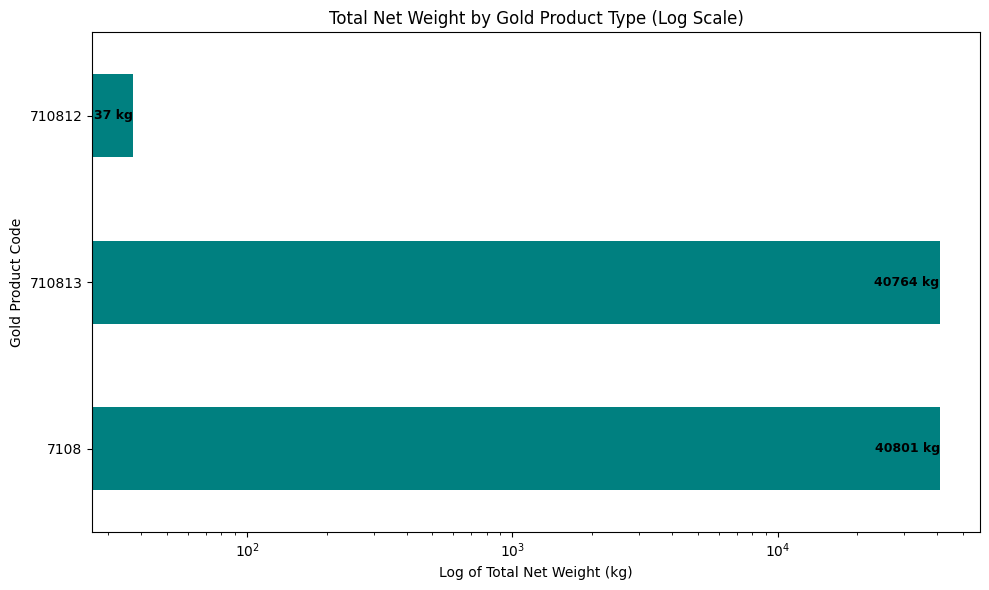

In [54]:
plt.figure(figsize=(10,6))
product_weights = df.groupby('cmdCode')['netWgt'].sum().sort_values(ascending=False)
ax = product_weights.plot(kind='barh', logx=True, color='teal')
plt.title('Total Net Weight by Gold Product Type (Log Scale)')
plt.xlabel('Log of Total Net Weight (kg)')
plt.ylabel('Gold Product Code')

for i, (index, value) in enumerate(product_weights.items()):
    ax.text(value, i, f'{value:.0f} kg', va='center', ha='right', fontsize=9, color='black', fontweight='bold')

plt.tight_layout()
plt.show()





### **Analysis of Burkina Faso's Gold Exports by Product Type (Log Scale)**

The visualization presents Burkina Faso's gold export volumes categorized by product type, using a **logarithmic scale** to compare vastly different quantities. Here's a structured breakdown:

---

#### **1. Product Code Breakdown**  
- **710812**:  
  - **Volume**: 37 kg  
  - **Interpretation**: Likely represents **refined gold (e.g., bars, coins)** in smaller quantities. Minimal export volume suggests this is a niche or high-value product.  

- **710813**:  
  - **Volume**: 40,764 kg  
  - **Interpretation**: Dominates exports, indicating **industrial or raw gold (e.g., doré bars, unrefined gold)**. This aligns with Burkina Faso's role as a major producer of raw gold for global refining.  

- **7108 (Parent Code)**:  
  - **Total Volume**: 40,801 kg (sum of 710812 + 710813)  
  - **Interpretation**: Confirms that **99.9% of exports** fall under raw/unrefined gold (710813), with refined products being negligible.  

---

#### **2. Logarithmic Scale Insights**  
- The **log scale (10² to 10⁴ kg)** highlights the extreme disparity between product types:  
  - **710813** dwarfs **710812** by ~1,100x, emphasizing Burkina Faso's focus on bulk raw gold exports.  
  - The near-flat line for **710812** suggests it is statistically insignificant in trade volume.  

---

#### **3. Sector Implications**  
- **Economic Dependence**: Heavy reliance on unrefined gold (710813) exposes Burkina Faso to **commodity price volatility** and limited value addition.  
- **Value Chain Gaps**: Minimal refined exports (710812) indicate underdeveloped local processing infrastructure, a missed opportunity for higher margins.  
- **Policy Considerations**:  
  - Incentivizing domestic refining could capture more value.  
  - Addressing smuggling (common with high-value 710812 products) may require stricter controls.  

---

#### **4. Recommendations**  
- **Diversification**: Invest in refining capacity to boost 710812 exports.  
- **Data Transparency**: Verify if low 710812 volumes reflect underreporting or smuggling.  
- **Comparative Analysis**: Benchmark against peers (e.g., Mali, Ghana) to identify best practices.  

---

**Key Takeaway**: Burkina Faso's gold exports are **overwhelmingly concentrated in raw/unrefined gold**, signaling both a vulnerability (price dependence) and an opportunity (value-chain development).  



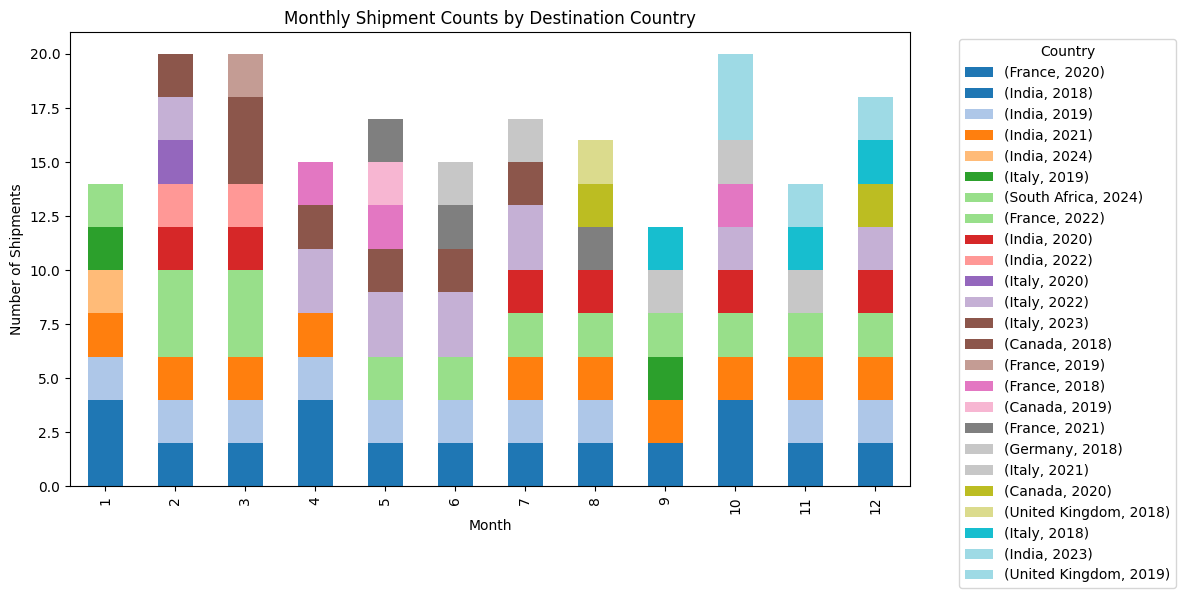

In [55]:
monthly_counts = df.groupby(['refMonth', 'partnerDesc', 'refYear']).size().reset_index(name='shipment_count')

# print(monthly_counts)

pivot = monthly_counts.pivot(index='refMonth', columns=['partnerDesc', 'refYear'], values='shipment_count').fillna(0)

pivot.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab20')
plt.title('Monthly Shipment Counts by Destination Country')
plt.xlabel('Month')
plt.ylabel('Number of Shipments')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



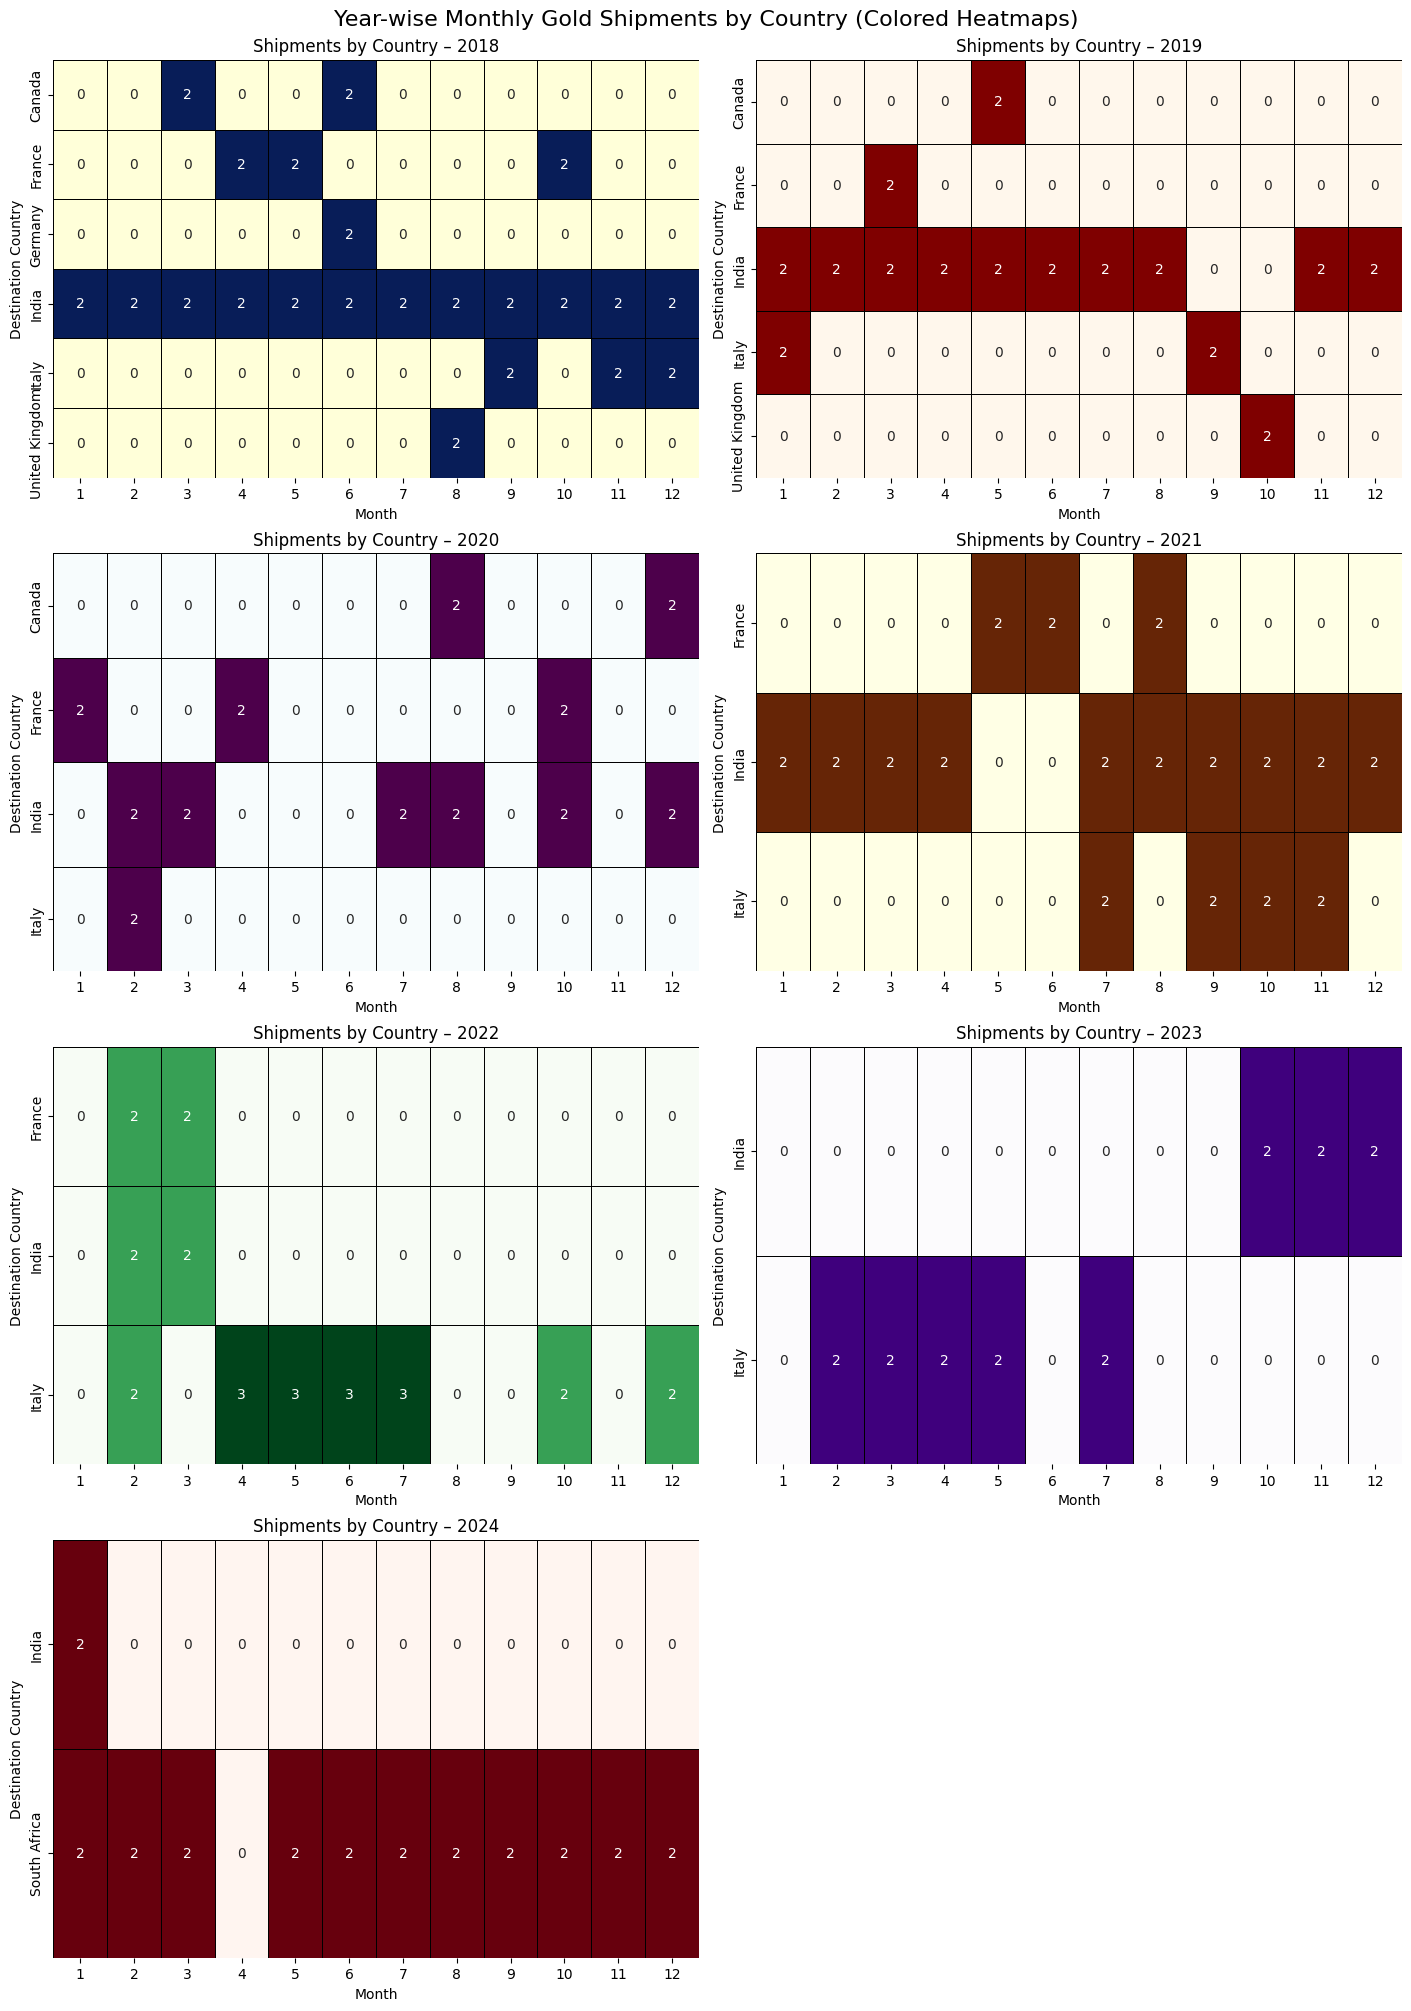

In [59]:
#Group and prepare the data
grouped = df.groupby(['refYear', 'partnerDesc', 'refMonth']).size().unstack(fill_value=0)

# Prepare subplot grid
years = sorted(grouped.index.get_level_values(0).unique())
n_years = len(years)
cols = 2
rows = (n_years + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows), constrained_layout=True)
axes = axes.flatten()

# Define unique colormaps per year
colormaps = [
    'YlGnBu', 'OrRd', 'BuPu', 'YlOrBr', 'Greens', 'Purples', 'Reds', 'Blues'
]
# Ensure enough colormaps
while len(colormaps) < len(years):
    colormaps.extend(colormaps)

# Plot each year's heatmap
for i, year in enumerate(years):
    data = grouped.loc[year]
    all_months = list(range(1, 13))
    data = data.reindex(columns=all_months, fill_value=0)

    sns.heatmap(data,annot=True,fmt='.0f',cmap=colormaps[i],ax=axes[i],cbar=False,linewidths=0.5,linecolor='black')
    axes[i].set_title(f'Shipments by Country – {year}', fontsize=12)
    axes[i].set_xlabel('Month')
    axes[i].set_ylabel('Destination Country')

# Step 5: Remove extra axes if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Title for all plots
plt.suptitle('Year-wise Monthly Gold Shipments by Country (Colored Heatmaps)', fontsize=16)
plt.show()


/tmp/ipython-input-57-1760138009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')


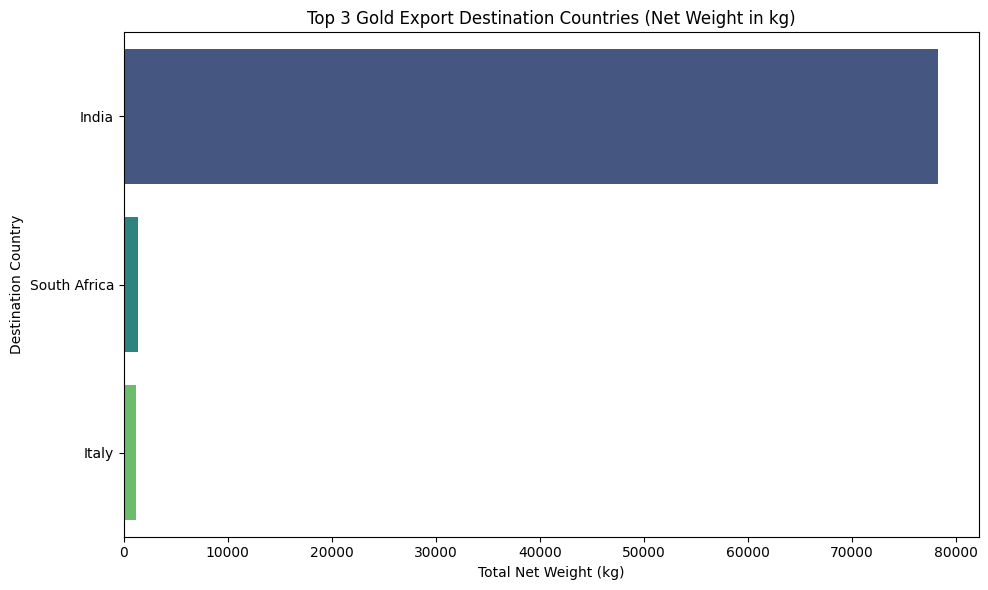

In [57]:
# top three gold export destiations
top_countries = df.groupby('partnerDesc')['netWgt'].sum().sort_values(ascending=False).head(3)
plt.figure(figsize=(10,6))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')
plt.title('Top 3 Gold Export Destination Countries (Net Weight in kg)')
plt.xlabel('Total Net Weight (kg)')
plt.ylabel('Destination Country')
plt.tight_layout()
plt.show()


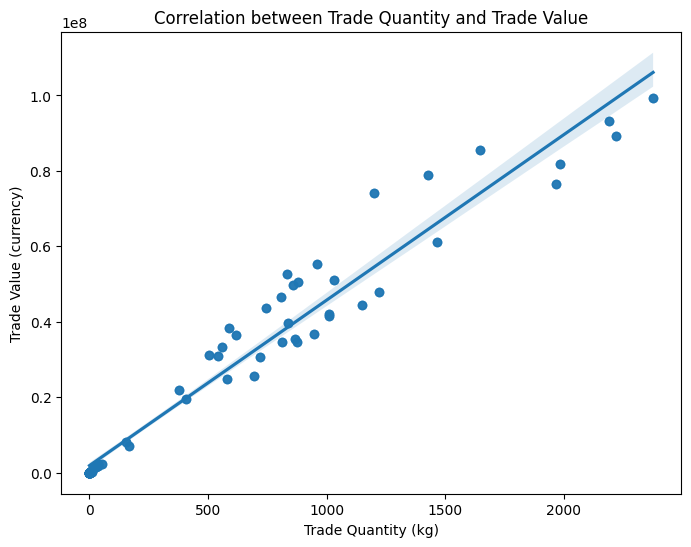

In [58]:
plt.figure(figsize=(8,6))
sns.regplot(x='qty', y='primaryValue', data=df)
plt.title('Correlation between Trade Quantity and Trade Value')
plt.xlabel('Trade Quantity (kg)')
plt.ylabel('Trade Value (currency)')
plt.show()

# # Calculate correlation coefficient
# corr = df['qty'].corr(df['primaryValue'])
# print(f"Correlation coefficient between qty and primaryValue: {corr:.2f}")